# Sentimental Analysis of IMDb review.
### Analyzing the reviews and sentiments OF them 
![imdb](https://static.amazon.jobs/teams/53/images/IMDb_Header_Page.jpg?1501027252)

# Basic terminologies.
### What is IMDb?
IMDb is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.

### What is sentimental analysis?
Sentiment analysis is analytical technique that uses statistics, natural language processing, and machine learning to determine the emotional meaning of communications.

# End Goal:
End goal of this project is to analyze the IMDb reviews and predit the sentiments regarding the reviews. As the data is in the text format and our main task is:
- Understanding the data 
- Analyzing and cleaning the data with the help of NLP text cleaning techniques.
- Build a AI/ML model that can predict the sentiments based on reviews on the IMDb


# Description of Dataset
MDB dataset having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. It consists of a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So,we have to predict the number of positive and negative reviews using either classification or deep learning algorithms.

## Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense,Input,Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Bidirectional, Flatten, BatchNormalization, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import transformers

In [2]:
data=pd.read_csv('IMDB Dataset.csv')
df = data.copy()
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

## Exploratory Data Analysis, text cleaning, and Visualization

In [3]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

- Dataset is balanced

In [4]:
df.isna().sum() # checking for any missing values

review       0
sentiment    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# duplicates in the data
num_duplicates = df.duplicated().sum()
print("There are {} duplicate reviews present in the dataset".format(num_duplicates))

There are 418 duplicate reviews present in the dataset


In [7]:
review = df['review']
duplicated_review = df[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review.head()

review sentiment
34058  "Go Fish" garnered Rose Troche rightly or wron...  negative
47467  "Go Fish" garnered Rose Troche rightly or wron...  negative
29956  "Three" is a seriously dumb shipwreck movie. M...  negative
31488  "Three" is a seriously dumb shipwreck movie. M...  negative
47527  "Witchery" might just be the most incoherent a...  negative

## Text Cleaning

StopWords:

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.


In [8]:
stop = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stop.update(punctuations)

## Basic Text Cleaning

In [9]:
# picking random text form review column
sample_text = df.review[8]
sample_text

"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."

In [10]:
# Removing HTML
soup = BeautifulSoup(sample_text, "html.parser")
sample_text = soup.get_text()
print(sample_text)

Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.


In [11]:
# Replacing sepcial characters and symbols, non-alphabets with sapces
sample_text = re.sub('\[[^]]*\]',' ',sample_text)
sample_text = sample_text.lower() # converting text into lowercase
print(sample_text)

encouraged by the positive comments about this film on here i was looking forward to watching this film. bad mistake. i've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). the film looks cheap and nasty and is boring in the extreme. rarely have i been so happy to see the end credits of a film. the only thing that prevents me giving this a 1-score is harvey keitel - while this is far from his best performance he at least seems to be making a bit of an effort. one for keitel obsessives only.


In [12]:
sample_text = re.sub('[^a-zA-Z]',' ',sample_text)
print(sample_text)

encouraged by the positive comments about this film on here i was looking forward to watching this film  bad mistake  i ve seen      films and this is truly one of the worst of them   it s awful in almost every way  editing  pacing  storyline   acting   soundtrack  the film s only song   a lame country tune   is played no less than four times   the film looks cheap and nasty and is boring in the extreme  rarely have i been so happy to see the end credits of a film  the only thing that prevents me giving this a   score is harvey keitel   while this is far from his best performance he at least seems to be making a bit of an effort  one for keitel obsessives only 


In [13]:
# Removing stop words
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

sample_text = nltk.word_tokenize(sample_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
sample_text = [word for word in sample_text if not word in set(stopwords.words("english"))]

- Like that we will apply this techniques to text data but we will not use tokenizer because the text analysis task is remaining.

## Cleaning the data 

In [15]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Applying function on review column
df['review'] = df['review'].apply(denoise_text)

In [16]:
df.head()

review sentiment
0  one reviewers mentioned watching oz episode ex...  positive
1  wonderful little filming technique fashion giv...  positive
2  thought wonderful way spend time hot summer si...  positive
3  basically family little boy thinks zombie clos...  negative
4  petter time visually stunning film mattei offe...  positive

In [17]:
# Converting sentiment column in numbers(i.e, 0s or 1s)

df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",0,inplace=True)

df.head(10)

review  sentiment
0  one reviewers mentioned watching oz episode ex...          1
1  wonderful little filming technique fashion giv...          1
2  thought wonderful way spend time hot summer si...          1
3  basically family little boy thinks zombie clos...          0
4  petter time visually stunning film mattei offe...          1
5  probably favorite story sacrifice dedication n...          1
6  sure would like see resurrection dated seahunt...          1
7  show fresh innovative idea first first years t...          0
8  encouraged positive comments film looking forw...          0
9  like original gut wrenching laughter like youn...          1

- Here the data is now cleaned and now we can go forward for Data Analytics

## Visulization

- WordCloud for postive and negatice texts

In [18]:
sns.set_style("whitegrid")

### WordCloud for Positive text

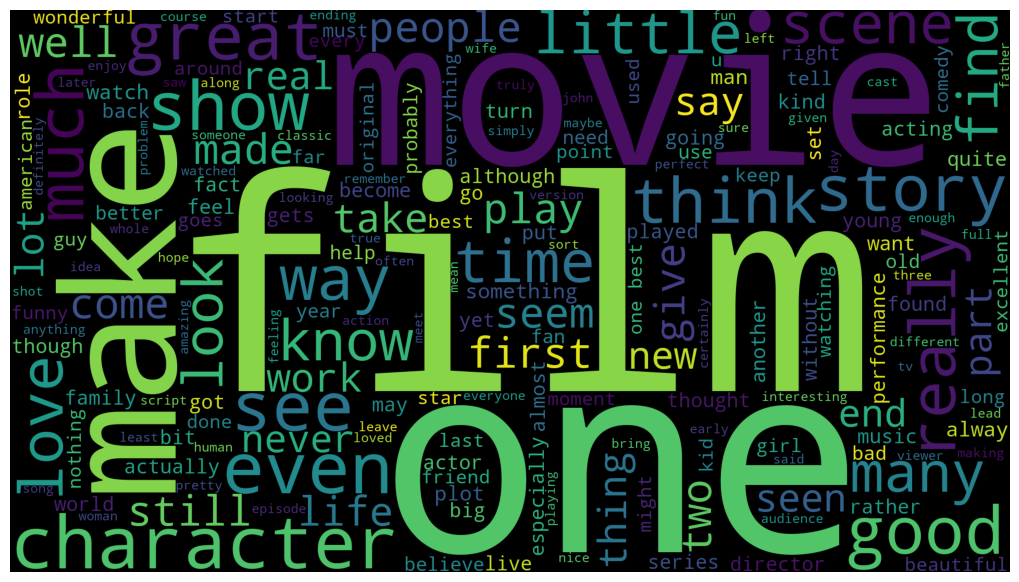

In [19]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==1].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### WordCloud for negative text

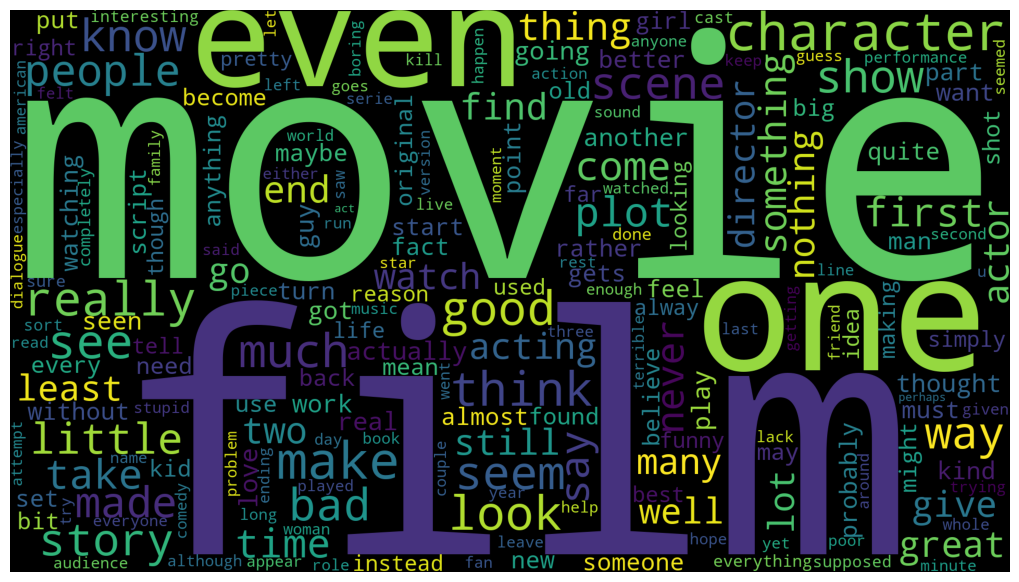

In [20]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==0].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Number of characters in texts

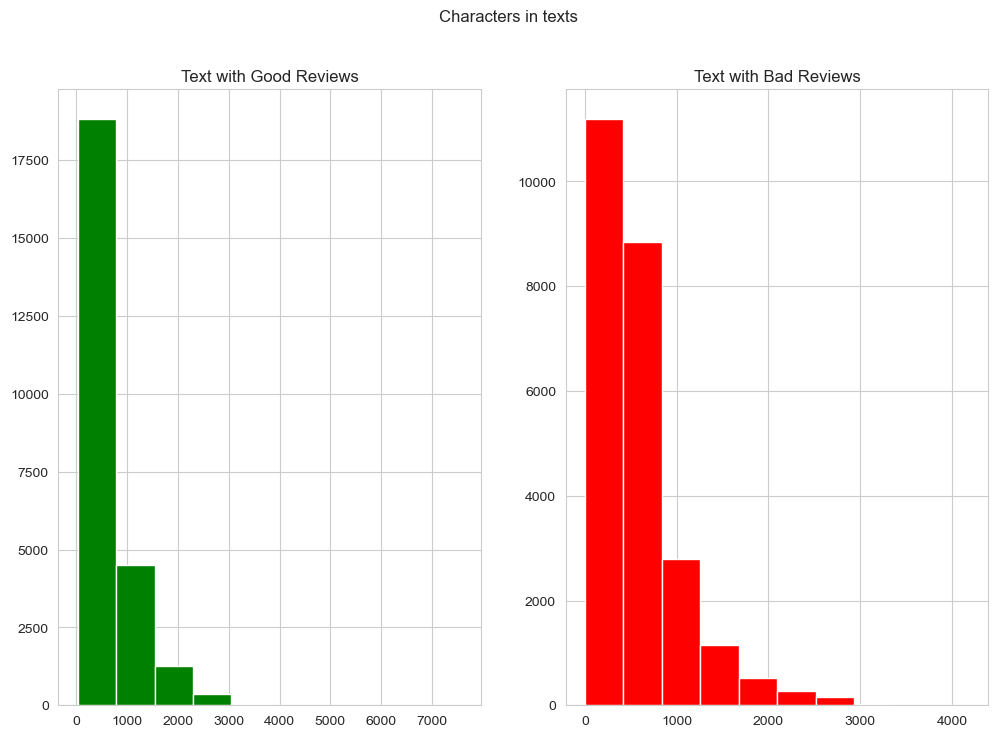

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

## Number of words in each text

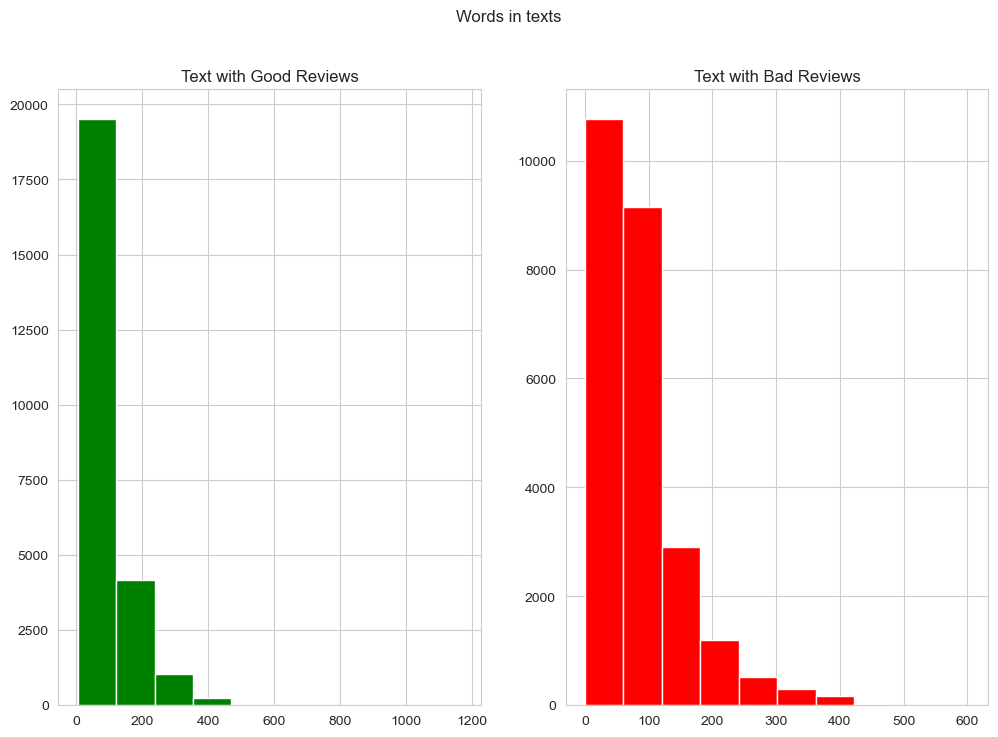

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

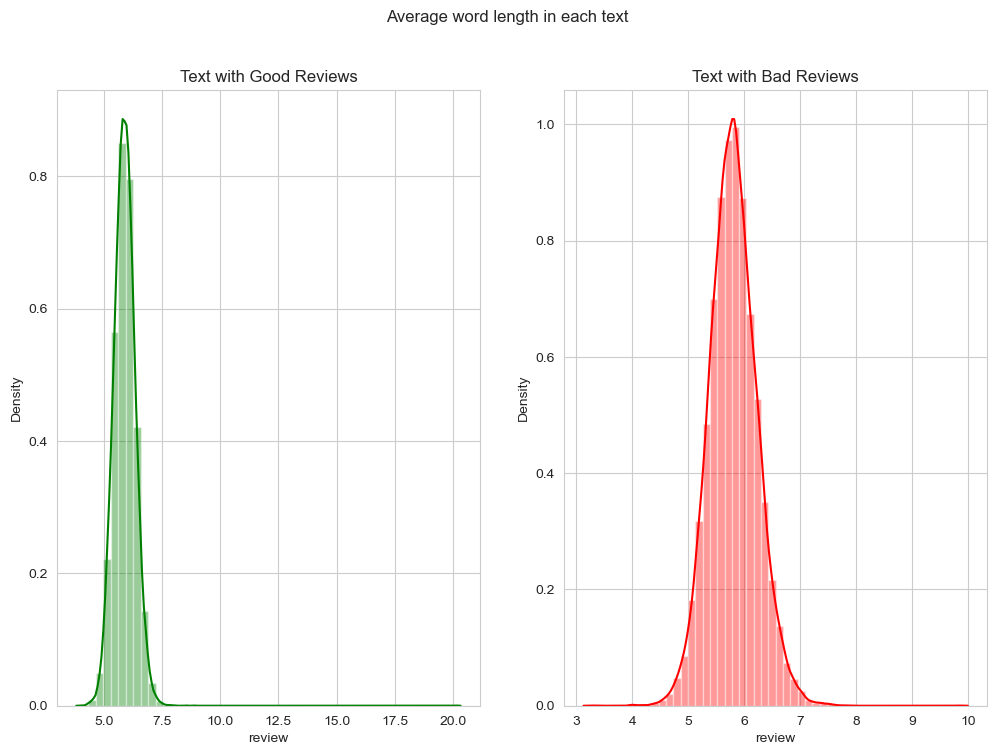

In [23]:
## Average word lenght in a text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
word=df[df['sentiment']==1]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']==0]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')
plt.show()

## Analyzing words 

In [24]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['one', 'reviewers', 'mentioned', 'watching', 'oz']

##### Most common words

In [25]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'movie': 61496,
 'film': 55088,
 'one': 45067,
 'like': 37303,
 'would': 23815,
 'even': 23720,
 'good': 23475,
 'really': 21806,
 'see': 20906,
 'get': 17692}

In [26]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Unigram(single word)

In [27]:
most_common_uni = get_top_text_ngrams(df.review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Word in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

#### Bigram(two words)

In [28]:
most_common_bi = get_top_text_ngrams(df.review,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Bigrams in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

#### Trigram(Three Words)

In [29]:
most_common_tri = get_top_text_ngrams(df.review,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Trigrams in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

# Data preprocecssing 

In [30]:
#splitting into train and test
train, test= train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']

# Generate and plot confusion matrix - TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Training Machine Learning models¶

---
## Cross Validation score vs Test accuracies:

The test result is more representative of the generalization ability of the model because it has never been used during the training process. However the cross-validation result is more representative because it represents the performance of the system on the 80% of the data instead of just the 20% of the training set. Moreover, if I change the split of my sets, the different test accuracies I get have a high variance but the average cross validation accuracy is more stable.


-----------

# TF-IDF

In [32]:
# Convert text data to TF-IDF features using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000) #tfidfVectorizer
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Logistic Regression

Logistic Regression Accuracy:  87.07%

Logistic Regresion cross validation score:  87.00%




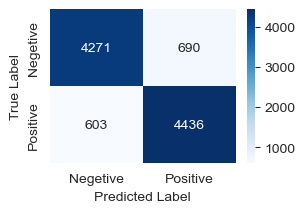

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4874
           1       0.88      0.87      0.87      5126

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
pred_lr = lr.predict(X_test_tfidf)
score_lr = accuracy_score(y_test, pred_lr)
lr_cvScore = cross_val_score(lr, X_train_tfidf, y_train, cv=5)
print("Logistic Regression Accuracy: ", "{:.2f}%".format(100*score_lr))
print("\nLogistic Regresion cross validation score: ","{:.2f}%".format(round(lr_cvScore.mean(),2)*100))
print("\n")

cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n")
print(classification_report(pred_lr,y_test))

# ROC

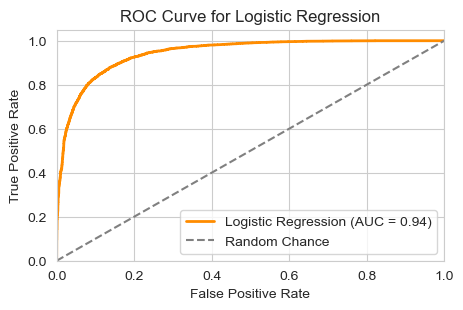

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer

# Create and fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = logreg_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


## Multinomial Naive Bayes

Multinomial Naive Bayes Accuracy:  83.65%

Multinomial Naive Bayes cross validation score:  84.00%




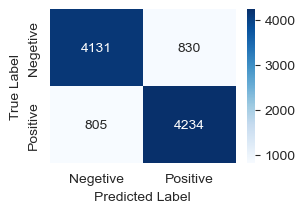

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4936
           1       0.84      0.84      0.84      5064

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [35]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
pred_mnb = mnb.predict(X_test_tfidf)
score_mnb = accuracy_score(y_test, pred_mnb)
mnb_cvScore = cross_val_score(mnb, X_train_tfidf, y_train, cv=5)
print("Multinomial Naive Bayes Accuracy: ", "{:.2f}%".format(100*score_mnb))
print("\nMultinomial Naive Bayes cross validation score: ","{:.2f}%".format(round(mnb_cvScore.mean(),2)*100))
print("\n")

cm = confusion_matrix(y_test, pred_mnb)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("Classification Report:\n")
print(classification_report(pred_mnb,y_test))

# ROC

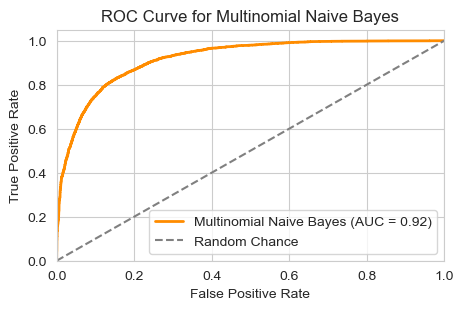

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer

# Create and fit the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = nb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Multinomial Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes')
plt.legend(loc='lower right')
plt.show()


## Liner SVM

Linear Support Vectpr Classifier Accuracy:  86.52%

Linear Support Vector Classifier cross validation score:  87.00%




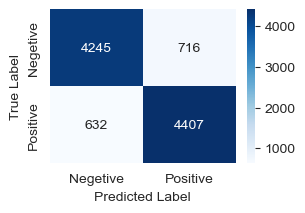

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4877
           1       0.87      0.86      0.87      5123

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [37]:
svc = LinearSVC(penalty='l2',loss='hinge')
svc.fit(X_train_tfidf, y_train)
pred_svc = svc.predict(X_test_tfidf)
score_svc = accuracy_score(y_test, pred_svc)
svc_cvScore = cross_val_score(svc, X_train_tfidf, y_train, cv=5)
print("Linear Support Vectpr Classifier Accuracy: ", "{:.2f}%".format(100*score_svc))
print("\nLinear Support Vector Classifier cross validation score: ","{:.2f}%".format(round(svc_cvScore.mean(),2)*100))
print("\n")

cm = confusion_matrix(y_test, pred_svc)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n")
print(classification_report(pred_svc,y_test))

# ROC

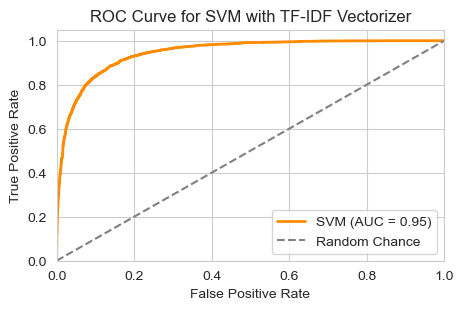

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer

# Create and fit the Support Vector Machine (SVM) model
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = svm_model.predict_proba(X_test_tfidf)[:, 1]

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with TF-IDF Vectorizer')
plt.legend(loc='lower right')
plt.show()


# K-NN model

Test Accuracy: 0.7176


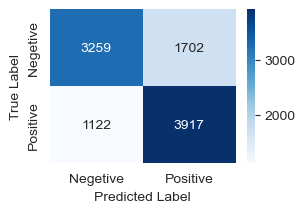

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      4381
           1       0.78      0.70      0.74      5619

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [39]:
# Build the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n")
print(classification_report(y_pred,y_test))

# ROC

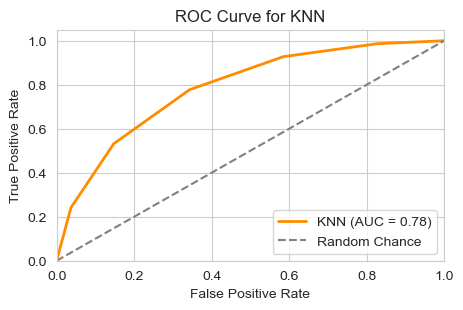

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer

# Create and fit the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = knn_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()


# Count Vectorizer

In [33]:
count_vect = CountVectorizer(max_features=5000) # CountVectorizer
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

# LogisticRegression

Logistic Regression Accuracy:  85.41%

Logistic Regresion cross validation score:  87.00%




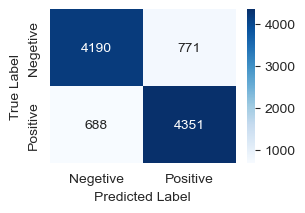

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4878
           1       0.86      0.85      0.86      5122

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train_count, y_train)
pred_lr = lr.predict(X_test_count)
score_lr = accuracy_score(y_test, pred_lr)
lr_cvScore = cross_val_score(lr, X_train_tfidf, y_train, cv=5)
print("Logistic Regression Accuracy: ", "{:.2f}%".format(100*score_lr))
print("\nLogistic Regresion cross validation score: ","{:.2f}%".format(round(lr_cvScore.mean(),2)*100))
print("\n")

cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("Classification Report:\n")
print(classification_report(pred_lr,y_test))

# ROC

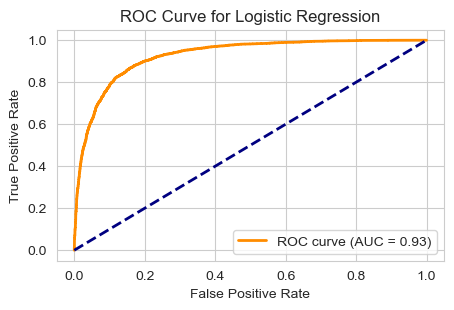

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer

# Assuming you have trained your Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = logistic_regression_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


# MultinomialNB

Multinomial Naive Bayes Accuracy:  83.50%

Multinomial Naive Bayes cross validation score:  84.00%




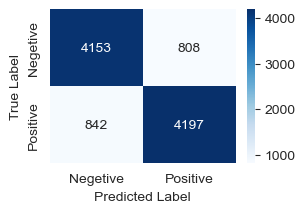

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4995
           1       0.83      0.84      0.84      5005

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [44]:
mnb = MultinomialNB()
mnb.fit(X_train_count, y_train)
pred_mnb = mnb.predict(X_test_count)
score_mnb = accuracy_score(y_test, pred_mnb)
mnb_cvScore = cross_val_score(mnb, X_train_tfidf, y_train, cv=5)
print("Multinomial Naive Bayes Accuracy: ", "{:.2f}%".format(100*score_mnb))
print("\nMultinomial Naive Bayes cross validation score: ","{:.2f}%".format(round(mnb_cvScore.mean(),2)*100))
print("\n")

cm = confusion_matrix(y_test, pred_mnb)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n")
print(classification_report(pred_mnb,y_test))

# ROC

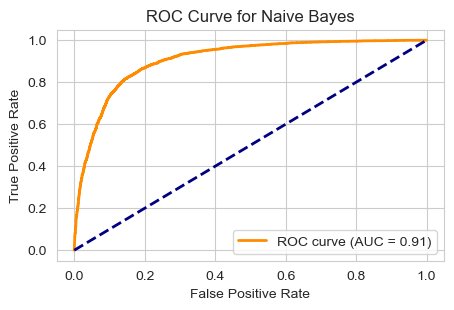

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer

# Assuming you have trained your Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = naive_bayes_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()


# LinearSVC

Linear Support Vectpr Classifier Accuracy:  84.44%

Linear Support Vector Classifier cross validation score:  87.00%




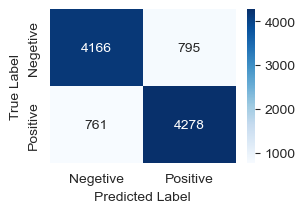

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4927
           1       0.85      0.84      0.85      5073

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [46]:
svc = LinearSVC(penalty='l2',loss='hinge')
svc.fit(X_train_count, y_train)
pred_svc = svc.predict(X_test_count)
score_svc = accuracy_score(y_test, pred_svc)
svc_cvScore = cross_val_score(svc, X_train_tfidf, y_train, cv=5)
print("Linear Support Vectpr Classifier Accuracy: ", "{:.2f}%".format(100*score_svc))
print("\nLinear Support Vector Classifier cross validation score: ","{:.2f}%".format(round(svc_cvScore.mean(),2)*100))
print("\n")

cm = confusion_matrix(y_test, pred_svc)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n")
print(classification_report(pred_svc,y_test))

# ROC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer

# Assuming you have trained your SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = svm_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()


# K-NN model

In [ ]:
# Build the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_count)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n")
print(classification_report(y_pred,y_test))

# ROC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data and labels
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer

# Assuming you have trained your KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = knn_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()


## Training the data with Neural Networks

In [34]:
# Function for plotting learning curve
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    
    ax[0].plot(epochRange,history.history['accuracy'],label='Training Accuracy')
    ax[0].plot(epochRange,history.history['val_accuracy'],label='Validation Accuracy')
    ax[0].set_title('Training and Validation Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[1].plot(epochRange,history.history['loss'],label='Training Loss')
    ax[1].plot(epochRange, history.history['val_loss'],label='Validation Loss')
    ax[1].set_title('Training and Validation loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    fig.tight_layout()
    plt.show()

In [35]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']
#splitting the train set into train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
                                             test_size=0.2,random_state=10)

In [36]:
X_train.shape, y_train.shape

((32000,), (32000,))

In [37]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  69948


In [38]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test =  tokenizer.texts_to_sequences(X_test)

In [39]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1171


In [40]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 225


In [41]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 94.52 % of data


In [42]:
#create padded sequences
pad_train=pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [43]:
X_train,X_val,y_train,y_val=train_test_split(pad_train,y_train,
                                             test_size=0.2,random_state=10)

In [44]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()
    
    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_accuracy', 
                                mode='min', 
                               patience = 2 )
    
    checkpoints= tf.keras.callbacks.ModelCheckpoint(filepath='./',
                            monitor="val_accuracy",
                             save_best_only=True
                            )
    callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32)
#                   callbacks = callbacks)
    print("\nTrain score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs


In [45]:
D = 64 #embedding dims
epochs = 5
r,model,n_epochs = lstm_model(X_train,X_val,y_train,y_val,V,D,max_seq_len,epochs)

----Building the model----
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 225)]             0         
                                                                 
 embedding (Embedding)       (None, 225, 64)           4476736   
                                                                 
 batch_normalization (Batch  (None, 225, 64)           256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 225, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 221, 32)           10272     
                                                                 
 dropout_1 (Dropout)         (None, 221, 32)           0         
                                  

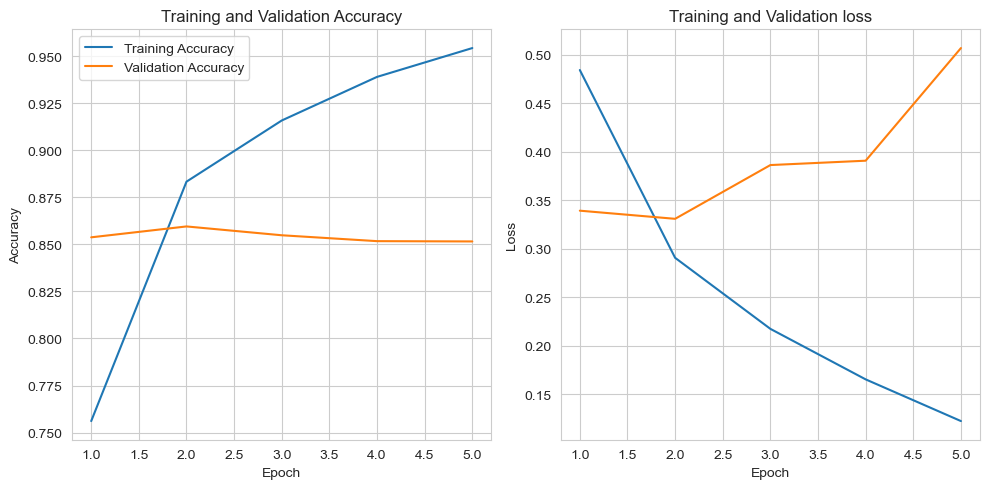

In [46]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

## Model Evaluation

In [47]:
print("Evaluate Model Performance on Test Set")
result = model.evaluate(pad_test, y_test)

Evaluate Model Performance on Test Set
313/313 [==============================] - 30s 87ms/step - loss: 0.4986 - accuracy: 0.8557


313/313 [==============================] - 24s 71ms/step


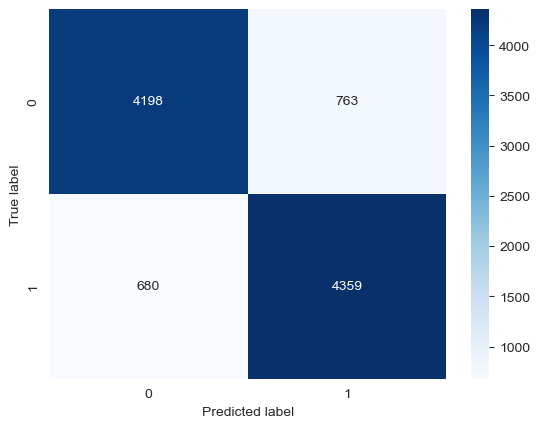

In [50]:
ypred = model.predict(pad_test)
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

313/313 [==============================] - 22s 70ms/step


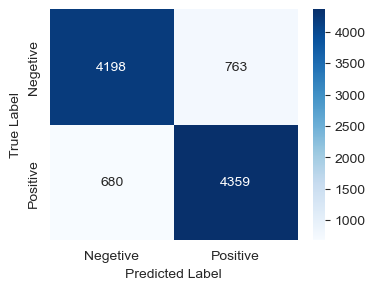

In [53]:
# Confusion MAtrix 
ypred = model.predict(pad_test)
ypred = ypred > 0.5

cm = confusion_matrix(y_test, ypred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negetive', 'Positive'], yticklabels=['Negetive', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, ypred)
print("Test Accuracy:", accuracy)

print("Classification Report:\n")
print(classification_report(y_test,ypred))

Test Accuracy: 0.8557
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



---
#### Linear SVC peromed better than neural networks model. Now let's train with transformers.

313/313 [==============================] - 21s 68ms/step


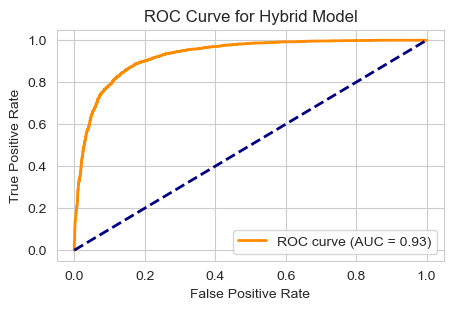

In [57]:
# Get predicted probabilities for the positive class
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
ypred = model.predict(pad_test)[:, 0]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Model')
plt.legend(loc='lower right')
plt.show()


# TF-IDF features using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in X, y

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Choose machine learning models
models = {
    'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Count-based features using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in X, y

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to count-based features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Choose machine learning models
models = {
    'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)
    
    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()